<a href="https://colab.research.google.com/github/JarvisSan22/JC_learn_python_Notebooks/blob/main/TJC_%E3%82%A4%E3%83%A9%E3%82%B9%E3%83%88%E5%B1%8B_scapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import requests
from bs4 import BeautifulSoup
from re import sub
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Test Scapper 

## Check main page

In [2]:
url="https://www.irasutoya.com/"
r= requests.get(url)
data=r.text
soup=BeautifulSoup(data)
boxs=soup.find_all('div', attrs={'class': 'box'})
boxs[0]

<div class="box" id="post">
<div class="boxim">
<script type="text/javascript">
//<![CDATA[
function bp_thumbnail_resize(image_url,post_title)
{
var image_size=180;
var show_default_thumbnail=true;
var default_thumbnail="https://3.bp.blogspot.com/-tB0SRYOut2g/Tx-XXdv4FtI/AAAAAAAABJU/rejihf5hfyk/s000/default.png";
if(show_default_thumbnail == true && image_url == "") image_url= default_thumbnail;
image_tag='<img src="'+image_url.replace('/s72-c','/s'+image_size+'-c')+'" class="boxthumb" alt="'+post_title+'"/>';
if(image_url!="") return image_tag; else return "";
}
//]]>
</script>
<a href="https://www.irasutoya.com/2021/11/blog-post_244.html"><script type="text/javascript">
document.write(bp_thumbnail_resize("https://1.bp.blogspot.com/-95qSZNI191g/YVaZ_P3hpJI/AAAAAAABfbU/xGRI8Qr2__0EachO3jQ2qznZngP8Ou4GwCNcBGAsYHQ/s72-c/coin_medal_bronze.png","山積みの銅貨のイラスト"));
</script></a>
</div>
<div class="boxmeta clearfix">
<h2>
<a href="https://www.irasutoya.com/2021/11/blog-post_244.html">山積みの銅貨のイラス

In [4]:
#Image page 
Ilra_URL=boxs[0].find("a").get("href")
print(Ilra_URL)

https://www.irasutoya.com/2021/11/blog-post_244.html


In [5]:
r= requests.get(Ilra_URL)
soup_I=BeautifulSoup(r.text)
img_html=soup_I.find("div", attrs={'class': "entry"} ).find("a")
href=img_html.get("href")
print(href)
alt=img_html.find("img").get("alt")
print(alt)

https://1.bp.blogspot.com/-95qSZNI191g/YVaZ_P3hpJI/AAAAAAABfbU/xGRI8Qr2__0EachO3jQ2qznZngP8Ou4GwCNcBGAsYHQ/s729/coin_medal_bronze.png
山積みの銅貨のイラスト


In [6]:
r = requests.get(href, allow_redirects=True)
open(f'{alt}.png', 'wb').write(r.content)

337570

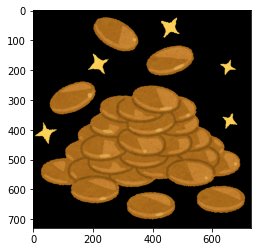

In [7]:
img=cv2.imread(f'{alt}.png')[:,:,::-1]
plt.imshow(img)

## Next page 

In [8]:
bottom_html=soup.find("div", attrs={'id': "postbottom"})
nextpage_url=bottom_html.find("a").get("href")
print(nextpage_url)

https://www.irasutoya.com/search?updated-max=2021-10-06T11:00:00%2B09:00&max-results=24


In [9]:
r= requests.get(nextpage_url)
soup_np=BeautifulSoup(r.text)
soup_np.find("span", attrs={"id":"blog-pager-older-link"}).find("a").get("href")

'https://www.irasutoya.com/search?updated-max=2021-09-02T15:00:00%2B09:00&max-results=24&start=24&by-date=false'

# Scapper Functions 

In [10]:
def GetIYImage(img_url,saveloc):
  r= requests.get(Ilra_URL)
  soup_I=BeautifulSoup(r.text)
  img_html=soup_I.find("div", attrs={'class': "entry"} ).find("a")
  href=img_html.get("href")
  #print(href)
  alt=img_html.find("img").get("alt")
  #print(alt)
  r = requests.get(href, allow_redirects=True)
  open(f'{saveloc}/{alt}.png', 'wb').write(r.content)

def GetImageBoxes(url):
  r= requests.get(url)
  data=r.text
  soup=BeautifulSoup(data)
  boxs=soup.find_all('div', attrs={'class': 'box'})
  return boxs, soup


In [11]:
#Scaper first page 
url="https://www.irasutoya.com/"
r= requests.get(url)
data=r.text
soup=BeautifulSoup(data)
boxs=soup.find_all('div', attrs={'class': 'box'})
saveloc="/content/drive/MyDrive/イラスト屋"
#os.makedirs(saveloc)
Firstpage=True

totaldownload=100
i=0
while i <=totaldownload:
  
  boxs,soup=GetImageBoxes(url)
  print(i,url,len(boxs))
  #First page 
  if Firstpage:
    
      #Update URL 
      bottom_html=soup.find("div", attrs={'id': "postbottom"})
      url=bottom_html.find("a").get("href")
      Firstpage=False
  else:
    #Update URL 
    r= requests.get(url)
    soup_np=BeautifulSoup(r.text)
    url=soup_np.find("span", attrs={"id":"blog-pager-older-link"}).find("a").get("href")
  for box in boxs:
    try:
      Ilra_URL=box.find("a").get("href")
      GetIYImage(Ilra_URL,saveloc)
      i+=1
    except:
      print("Error")
      print(Ilra_URL)

0 https://www.irasutoya.com/ 24
24 https://www.irasutoya.com/search?updated-max=2021-10-06T11:00:00%2B09:00&max-results=24 24
48 https://www.irasutoya.com/search?updated-max=2021-09-02T15:00:00%2B09:00&max-results=24&start=24&by-date=false 24
72 https://www.irasutoya.com/search?updated-max=2021-07-26T10:00:00%2B09:00&max-results=24&start=48&by-date=false 24
96 https://www.irasutoya.com/search?updated-max=2021-06-21T11:00:00%2B09:00&max-results=24&start=72&by-date=false 21
